## Imports

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import scipy.stats as stats

### Reading in the Dataset and Summary Statistics 

In [2]:
df = pd.read_csv('./DATA/train.csv')

In [3]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
## Dropped the ID column as it was a duplicate, already present
df = df.drop('id', axis=1)

In [7]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


### Univariate Analysis

#### Distribution of Each Numeric Feature 

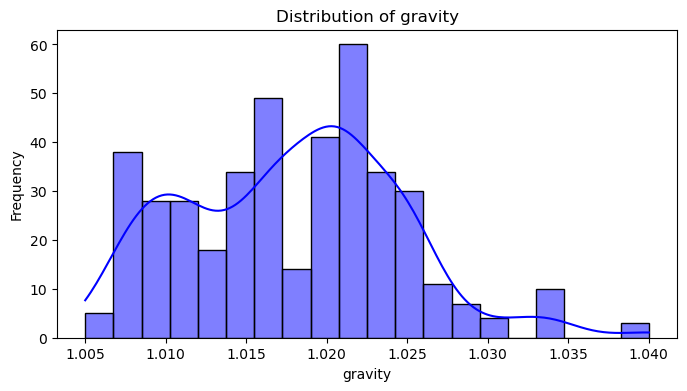

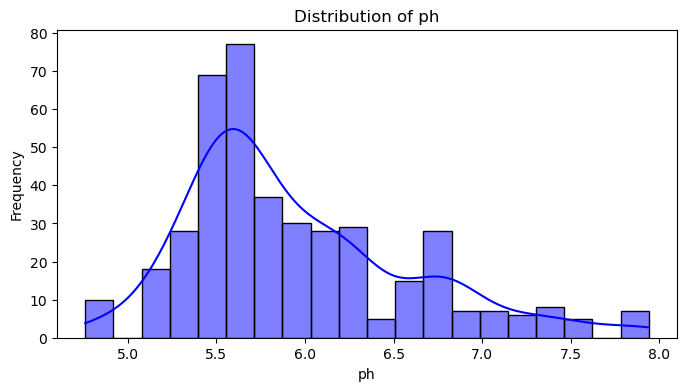

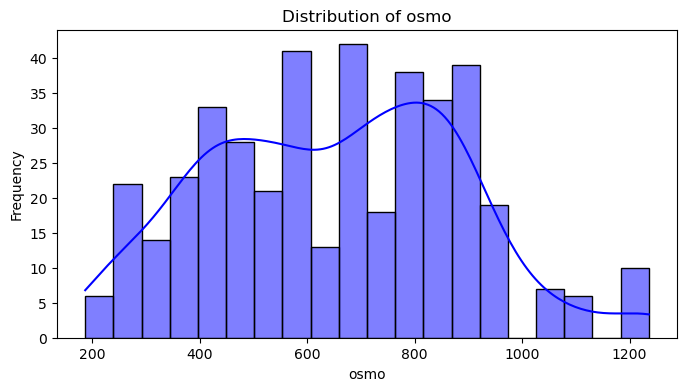

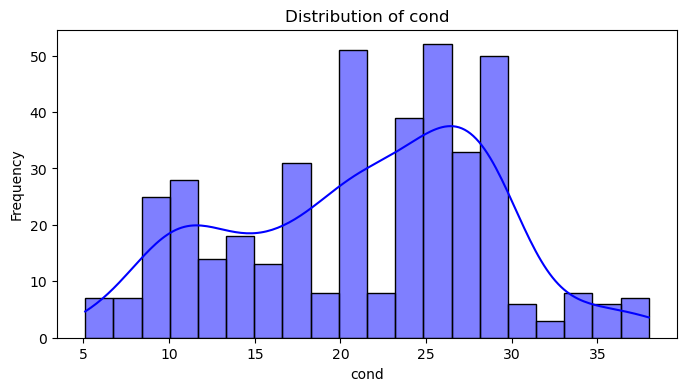

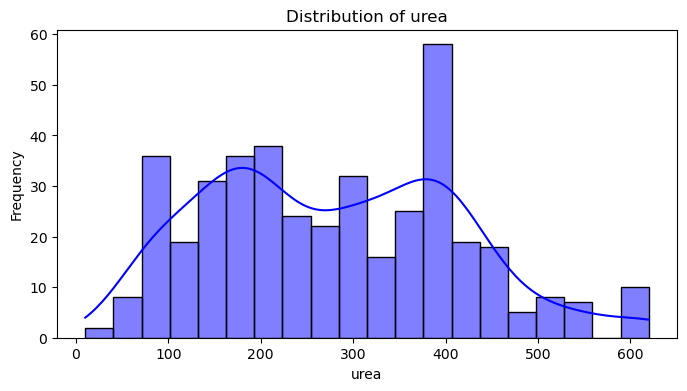

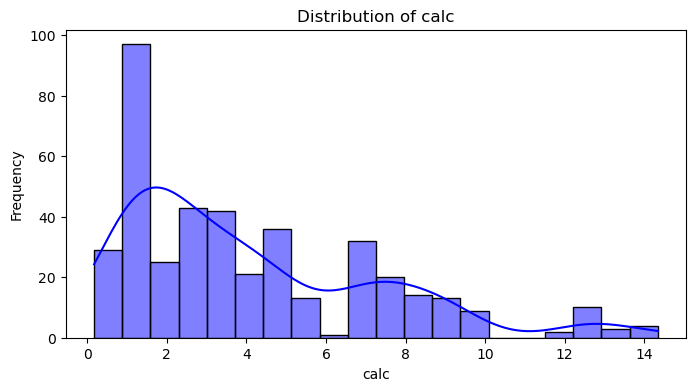

In [12]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Summary Statistics

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


In [16]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


#### Distribution of the Target Variable 

C:\Windows\Temp\ipykernel_4504\796619502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette=palette);


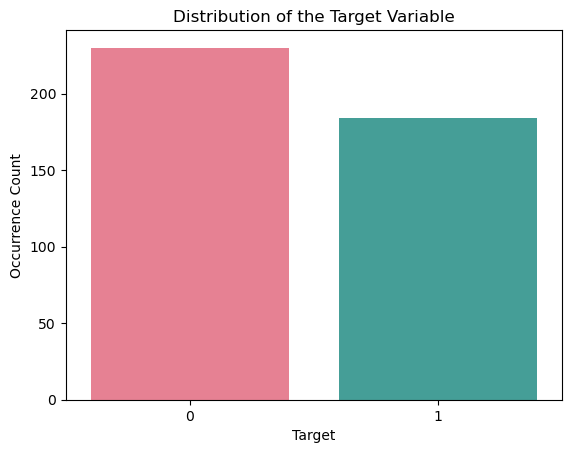

In [21]:
palette = sns.color_palette("husl", len(df['target'].unique())) 

sns.countplot(data=df, x='target', palette=palette);
plt.title('Distribution of the Target Variable')
plt.xlabel('Target')
plt.ylabel('Occurrence Count');

#### Missing Values in the Dataset 

In [22]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

#### Outliers in the Dataset 

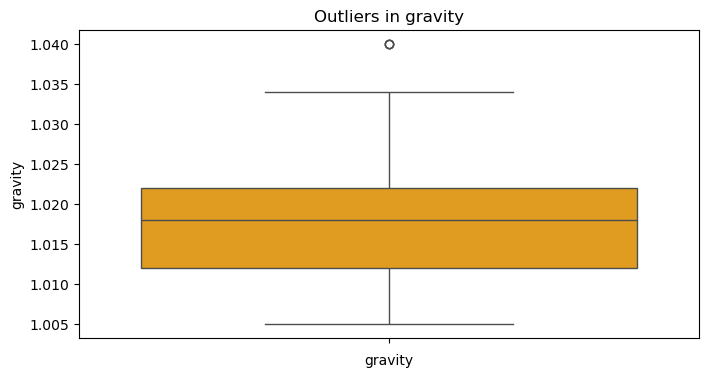

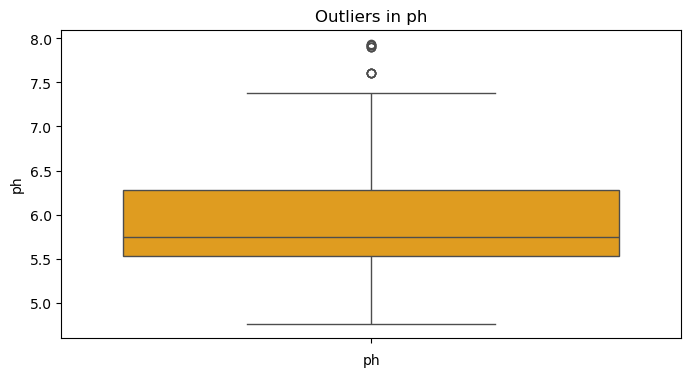

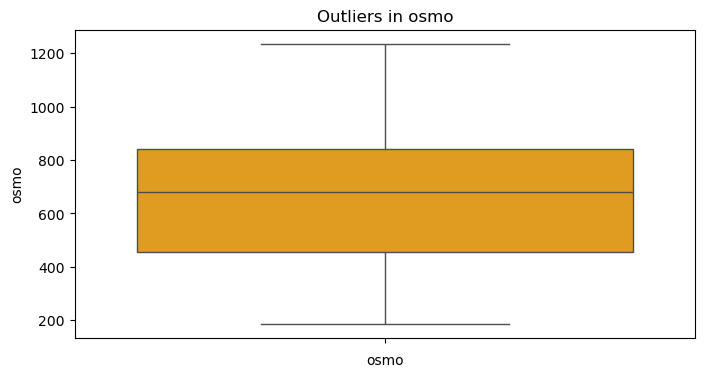

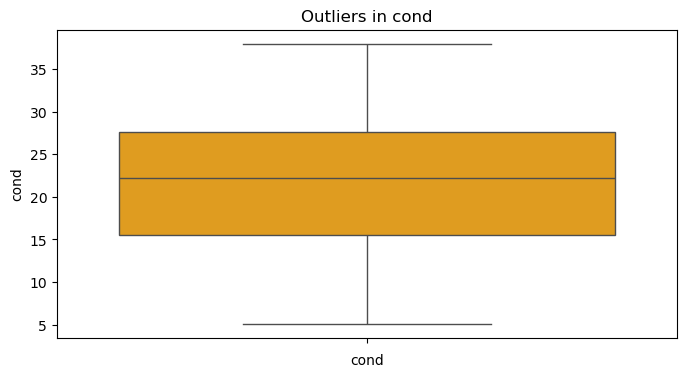

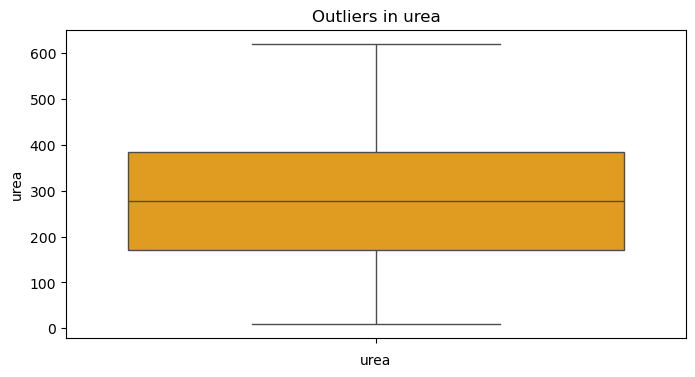

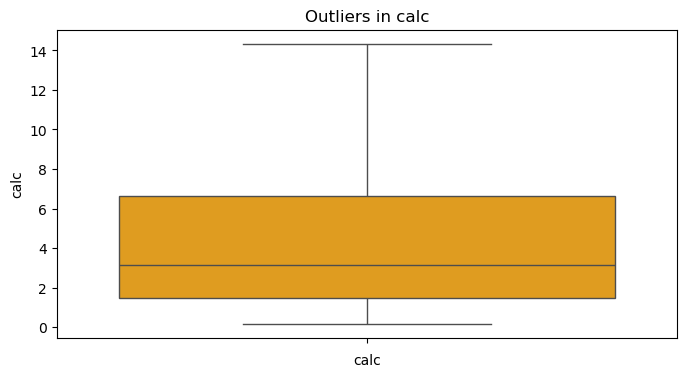

In [24]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col], color='orange')
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis

#### How do features vary across 2 classes of the target variable?

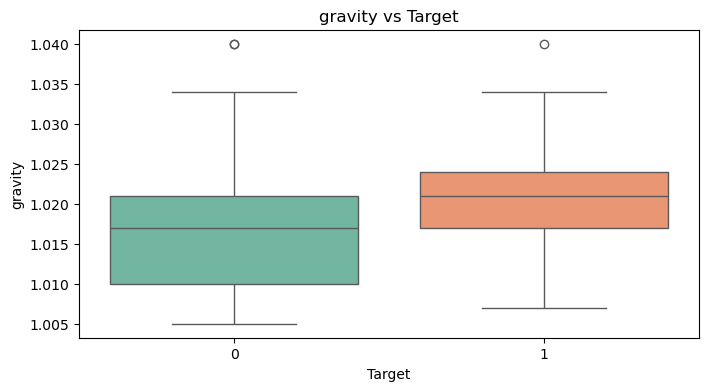

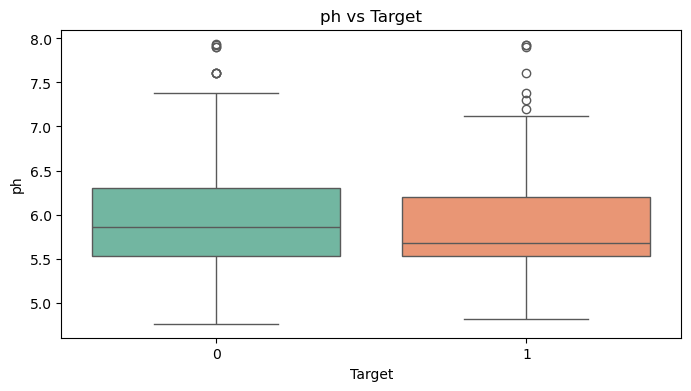

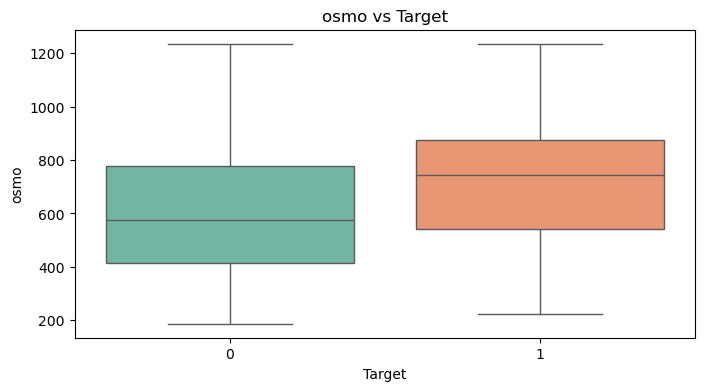

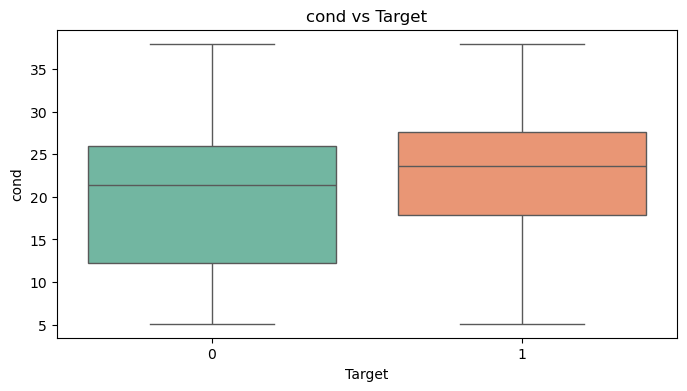

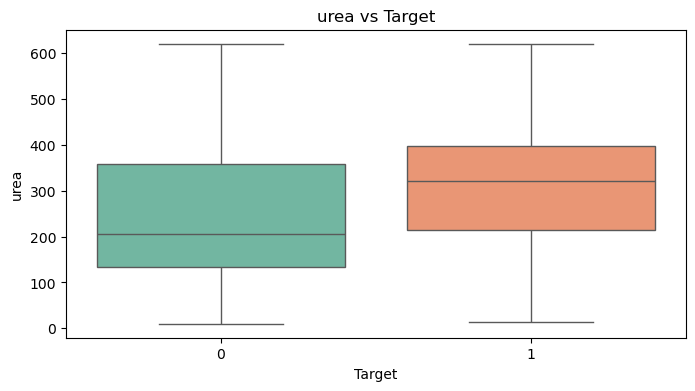

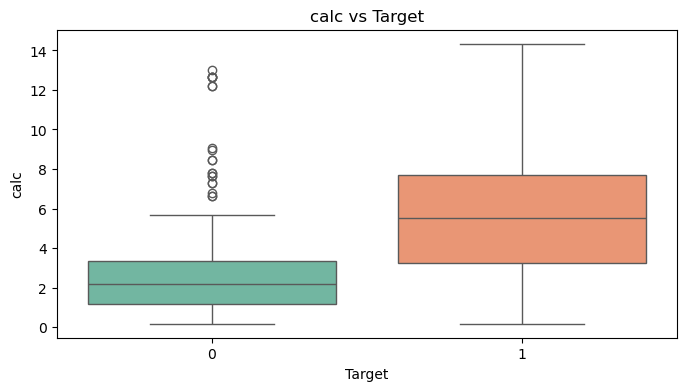

In [28]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=col, data=df, hue='target', palette='Set2', dodge=False, legend=False)
    plt.title(f'{col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

#### How do gravity and osmo relate, and how do their relationships vary across target classes?

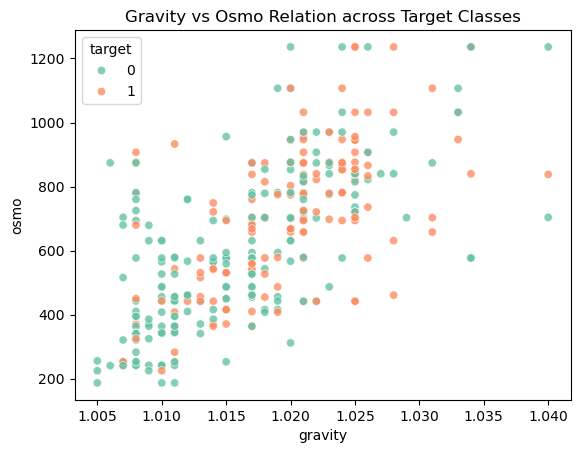

In [33]:
sns.scatterplot(x='gravity', y='osmo', data=df, hue='target', alpha=0.8, palette='Set2');
plt.title('Gravity vs Osmo Relation across Target Classes');

#### Checking Strong Correlations between Numeric Features

<Axes: >

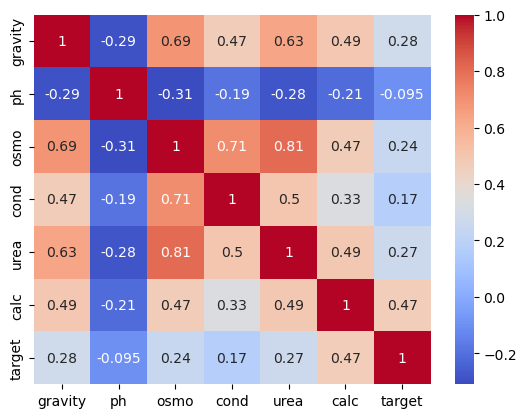

In [39]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#### Relationships between Features that are Significant 

In [42]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    group1 = df[df['target'] == 0][col]
    group2 = df[df['target'] == 1][col]
    stat, p_value = stats.ttest_ind(group1, group2)
    print(f'{col}: p-value = {p_value:.4f}')

gravity: p-value = 0.0000
ph: p-value = 0.0535
osmo: p-value = 0.0000
cond: p-value = 0.0004
urea: p-value = 0.0000
calc: p-value = 0.0000


### Multivariate Analysis 

#### How do combinations of 2 features affect the target variable?

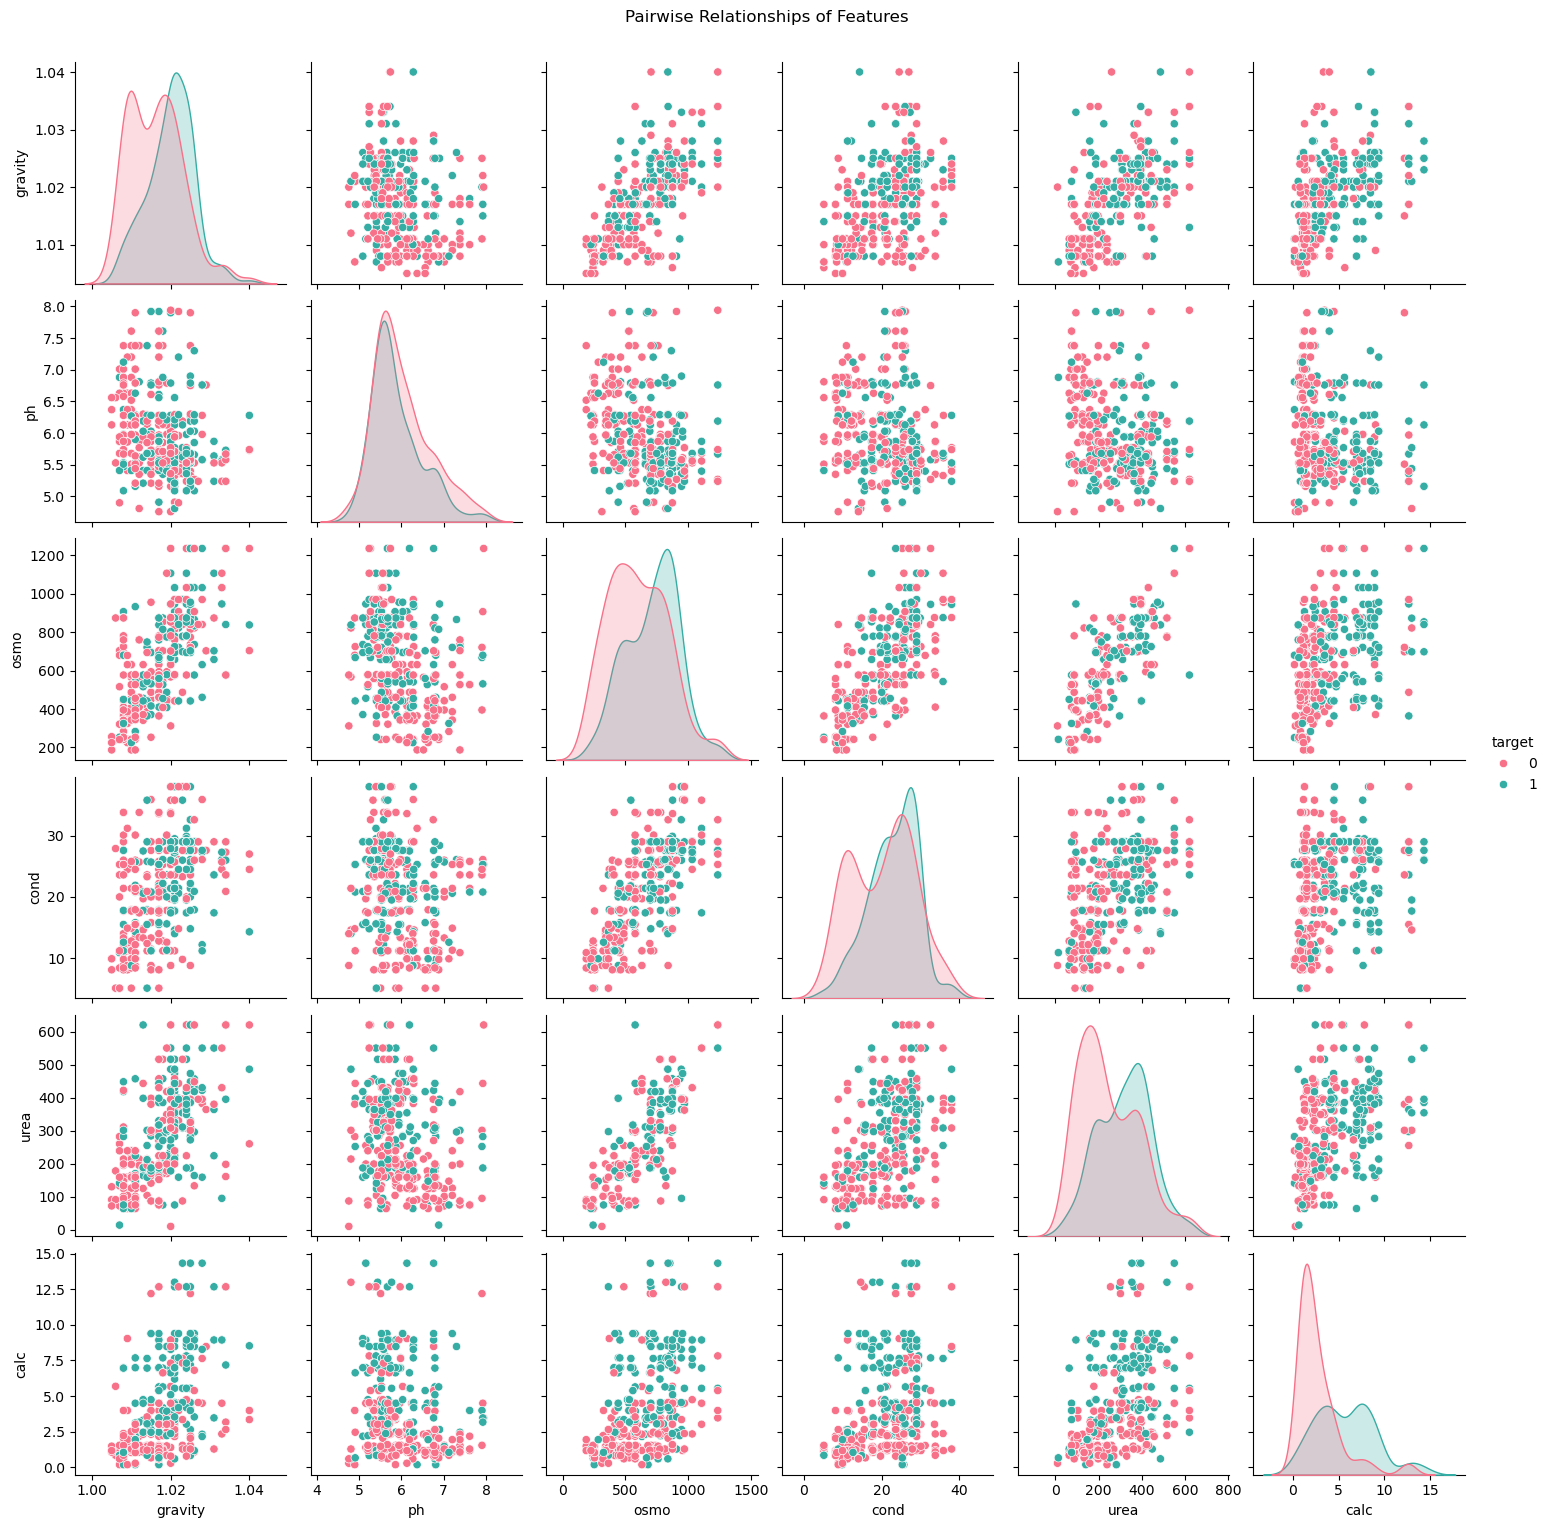

In [44]:
sns.pairplot(df, vars=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], hue='target', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()

#### Features with Overlapping Ranges across Classes 

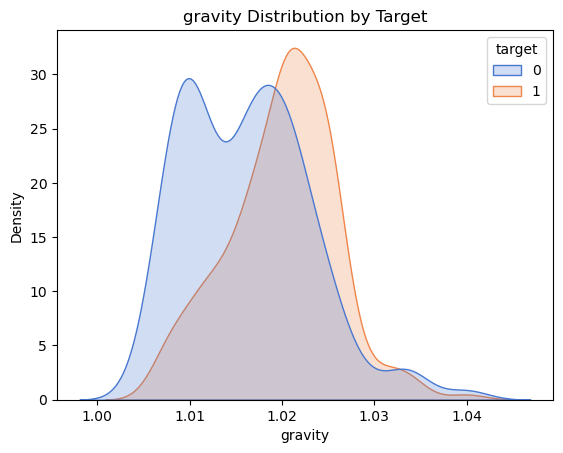

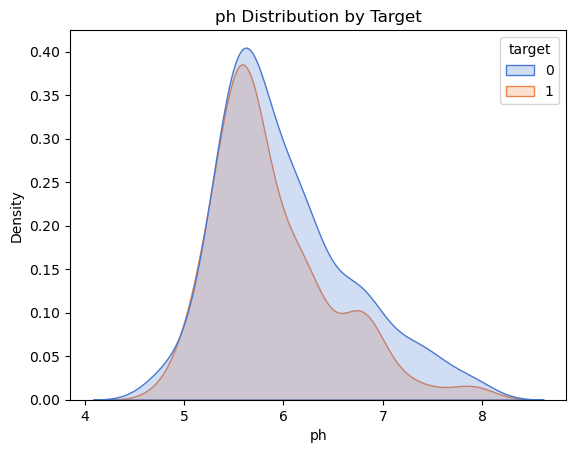

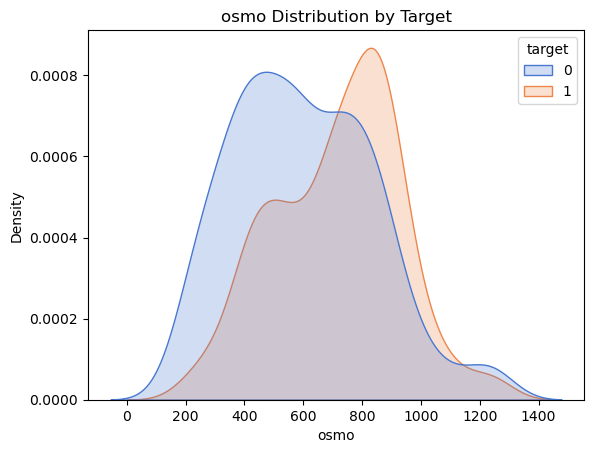

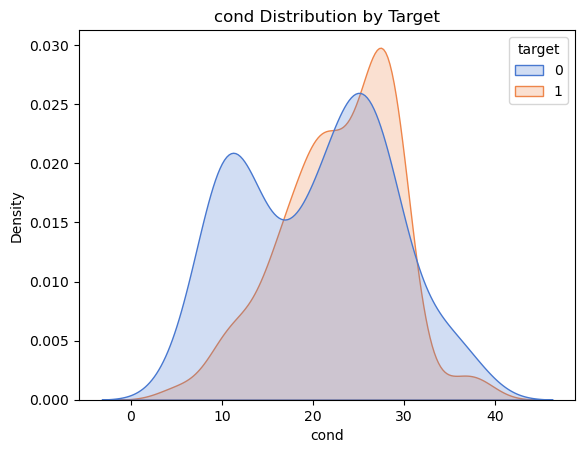

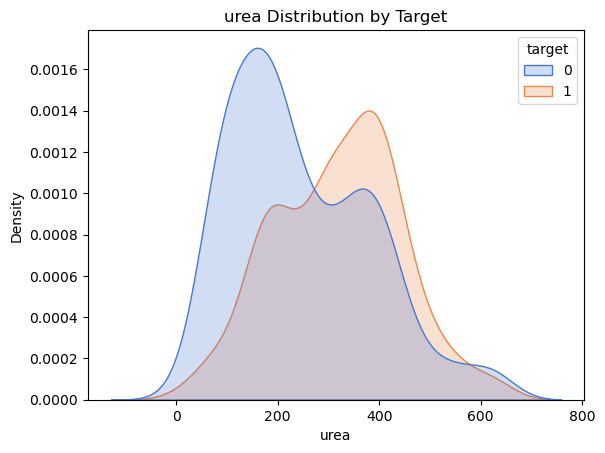

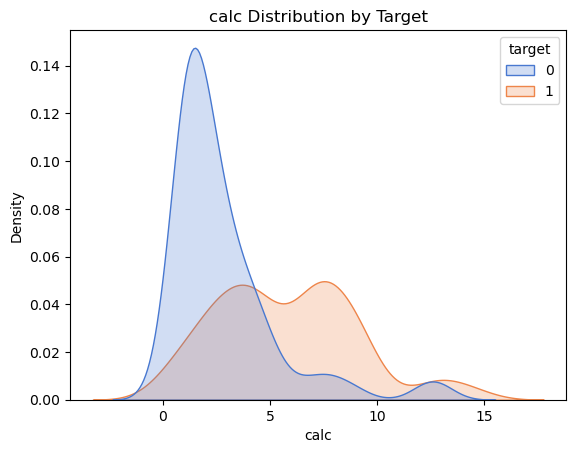

In [46]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    sns.kdeplot(data=df, x=col, hue='target', fill=True, palette='muted')
    plt.title(f'{col} Distribution by Target')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### Conditional Analysis 

#### Conditional Variance in the Distributions of Features 

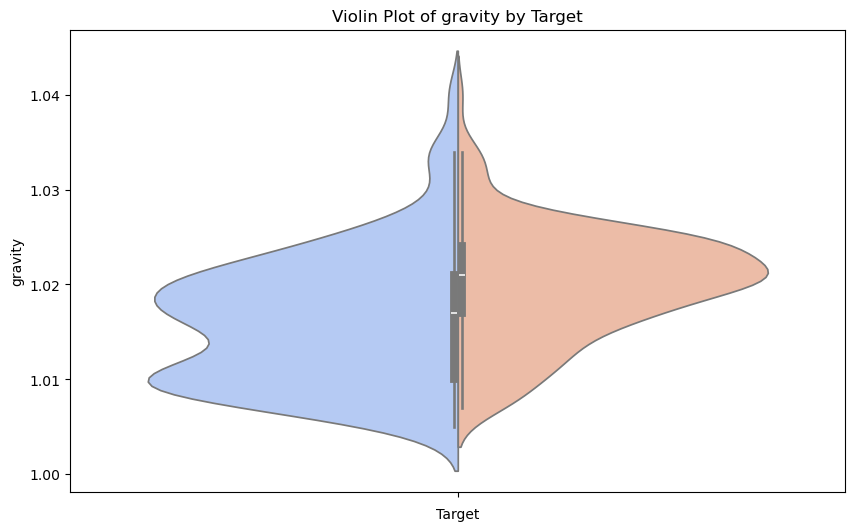

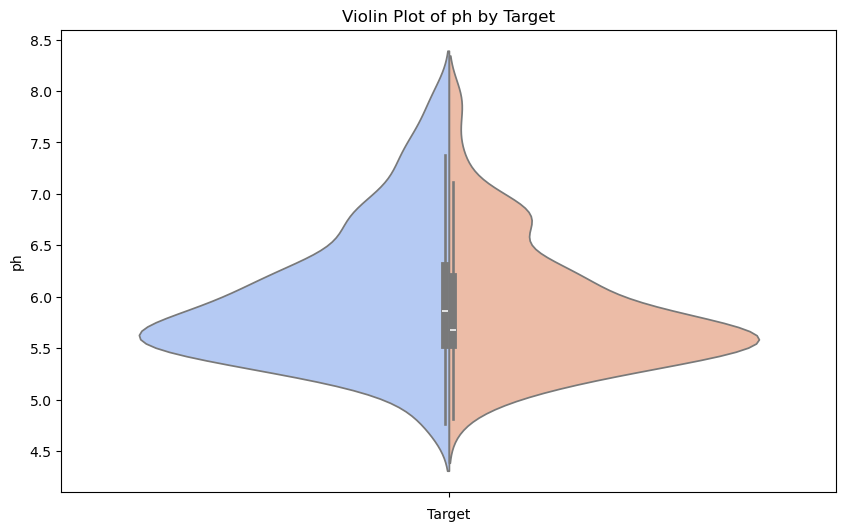

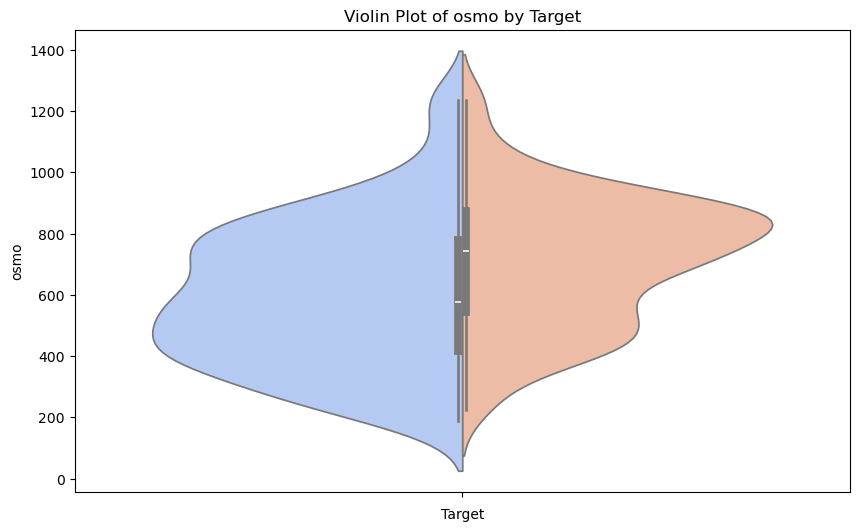

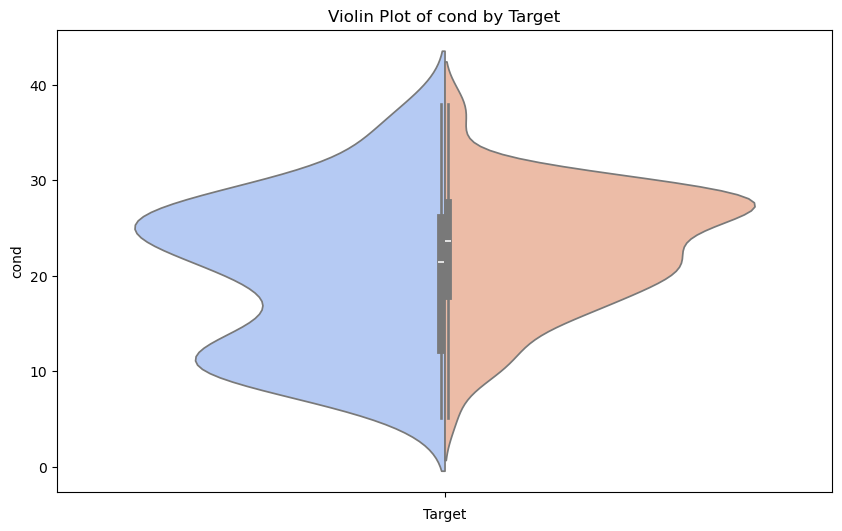

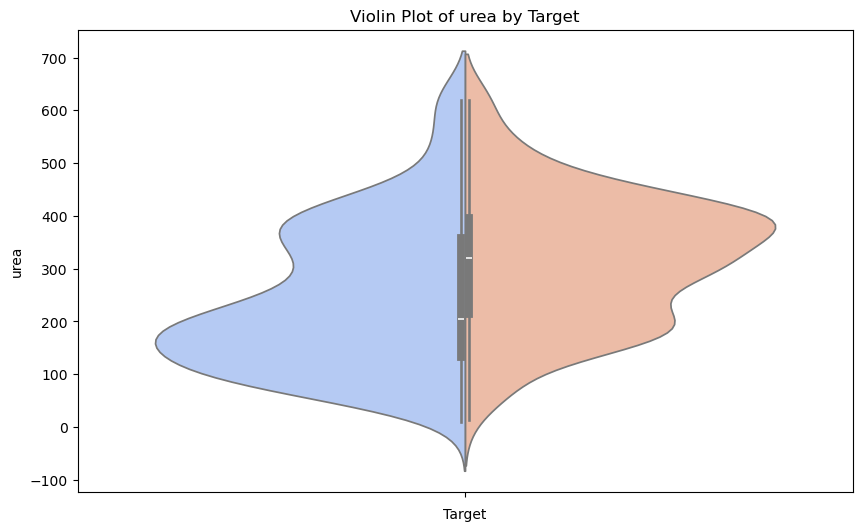

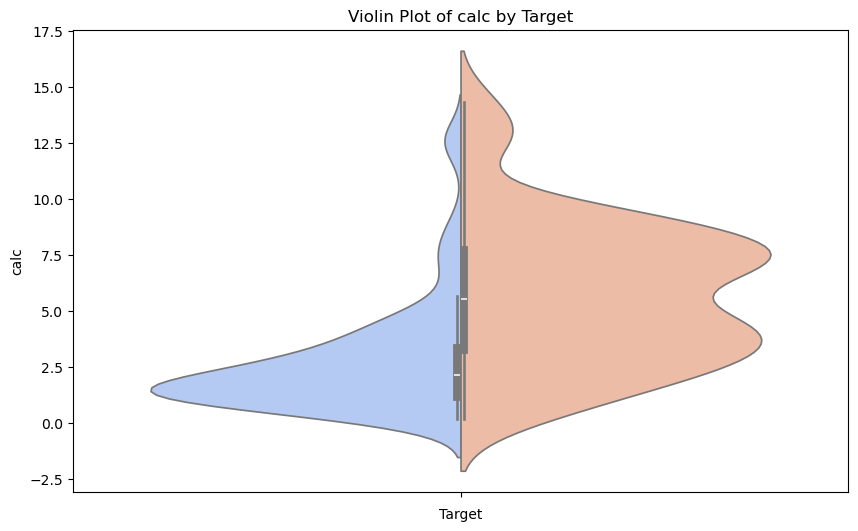

In [49]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(10, 6))
    sns.violinplot(hue='target', y=col, data=df, palette='coolwarm', legend=False, split=True)
    plt.title(f'Violin Plot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

### Outlier Exploration - Do outliers significantly affect target variable?

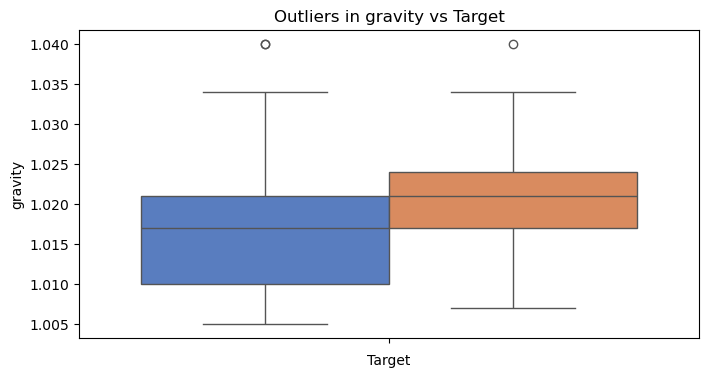

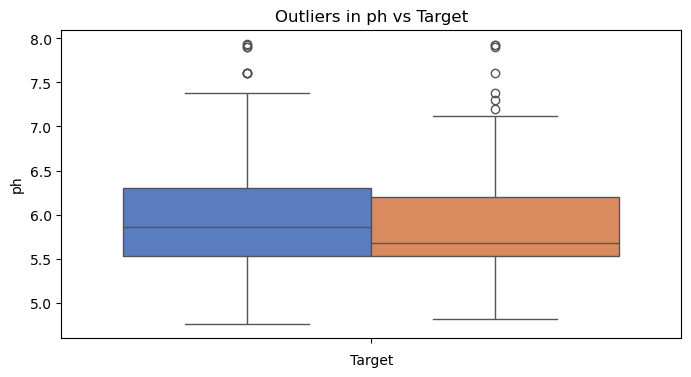

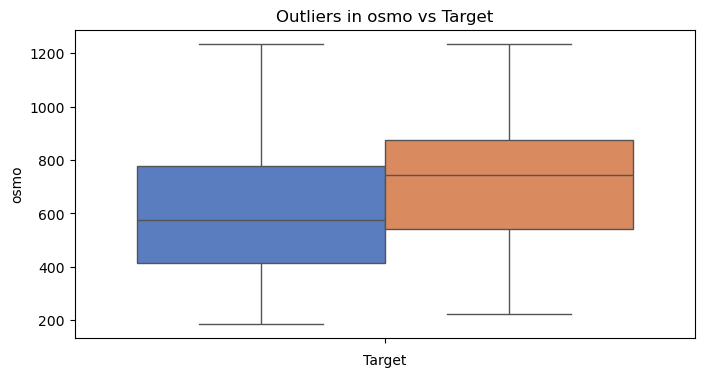

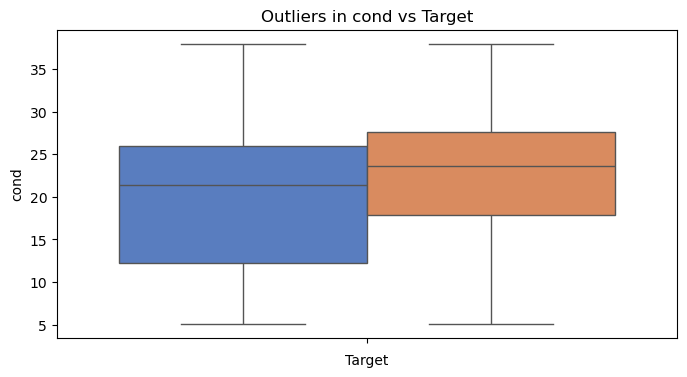

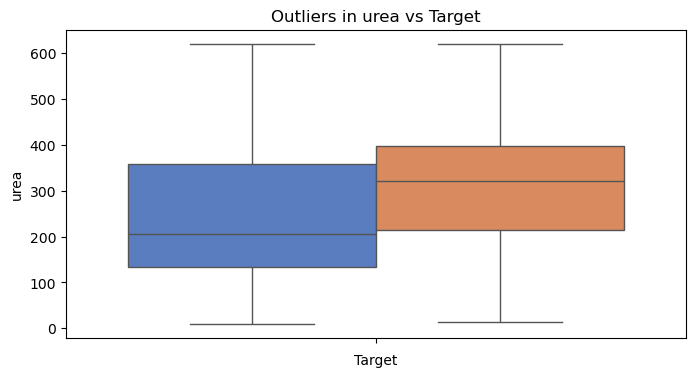

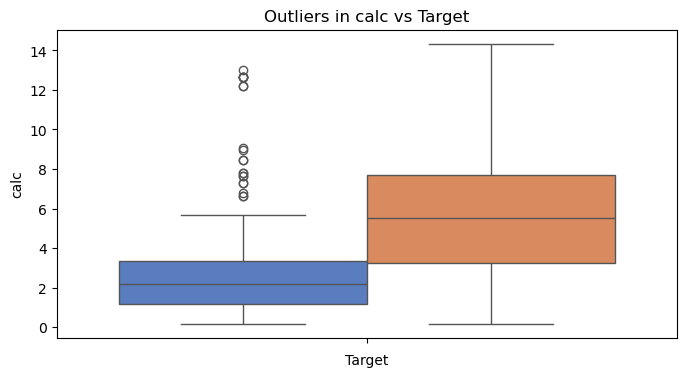

In [51]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(hue='target', y=col, data=df, palette='muted', legend=False)
    plt.title(f'Outliers in {col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

### General Observations

### Balance in Feature Distributions 

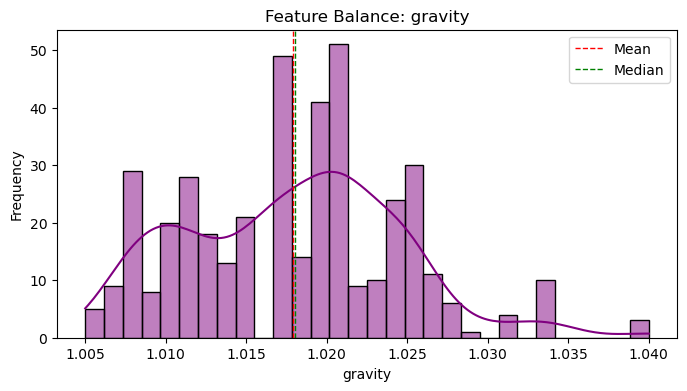

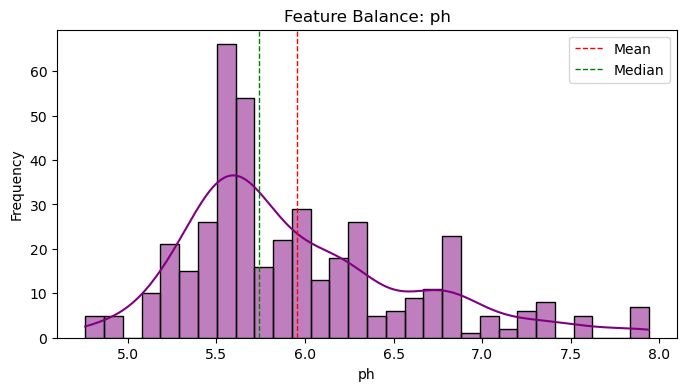

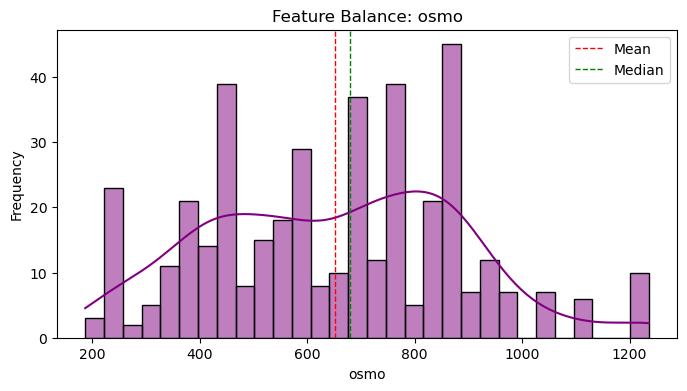

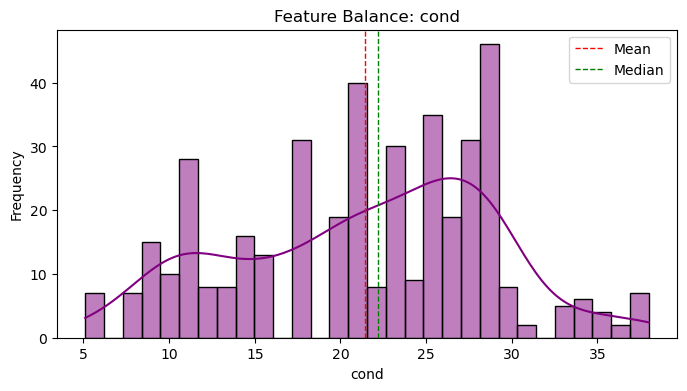

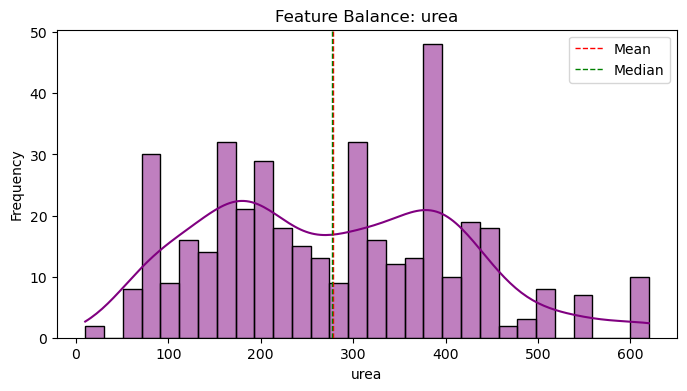

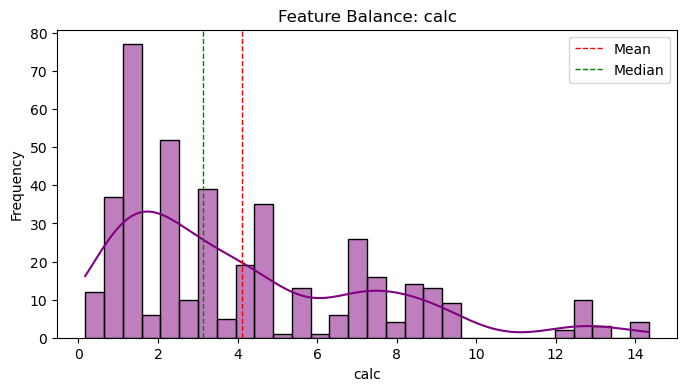

In [52]:
for col in ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='purple', edgecolor='black')
    plt.title(f'Feature Balance: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()
    plt.show()

#### Trends in Feature Interactions with Extreme Values 

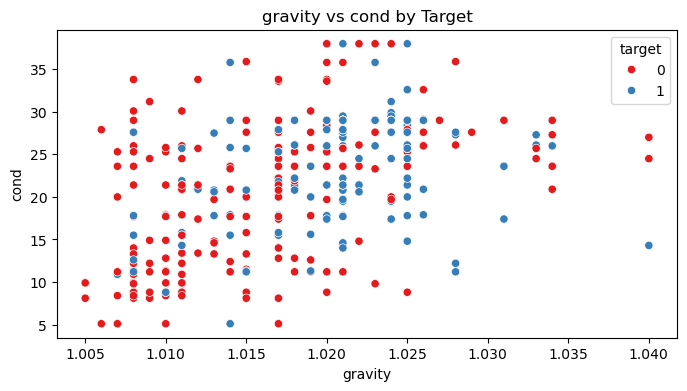

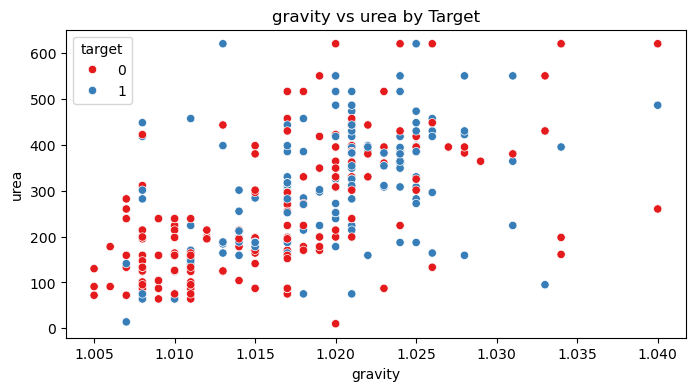

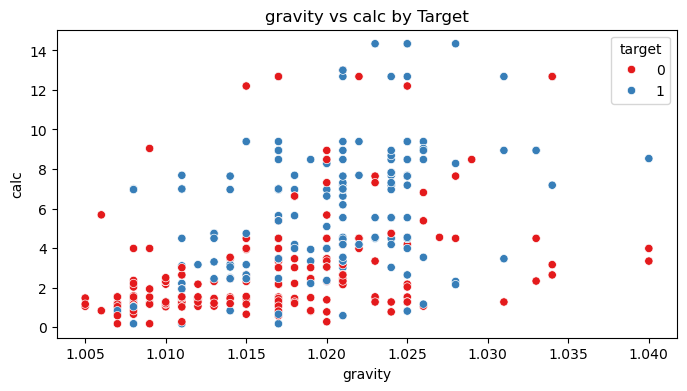

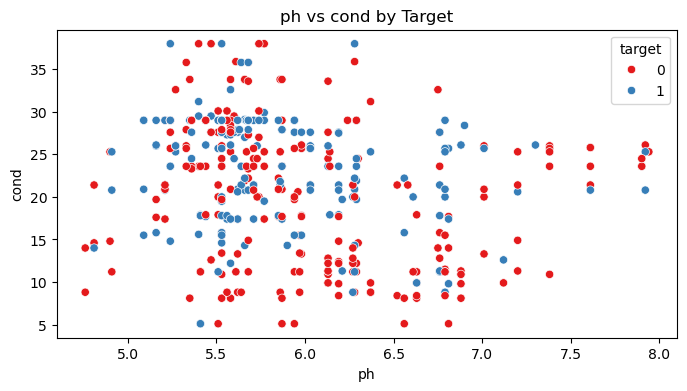

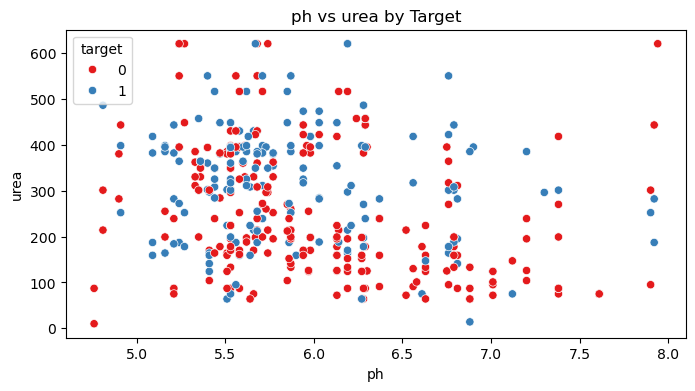

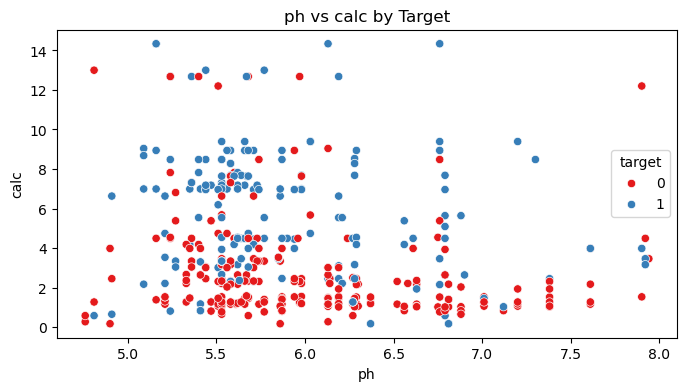

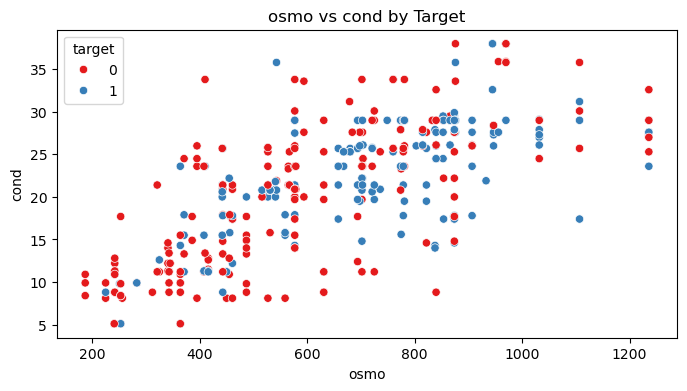

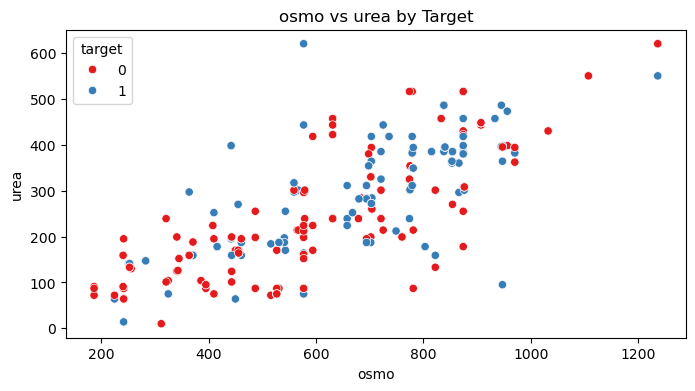

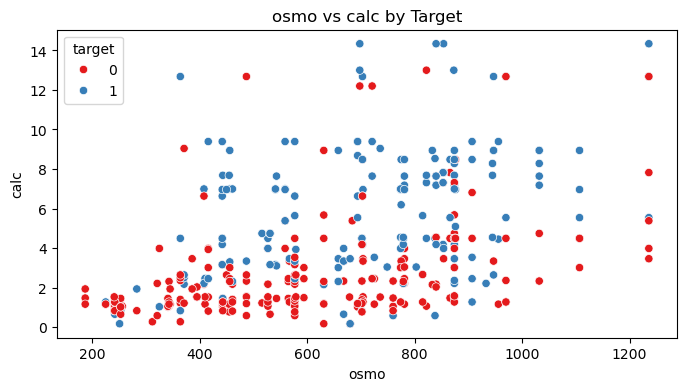

In [54]:
for col1 in ['gravity', 'ph', 'osmo']:
    for col2 in ['cond', 'urea', 'calc']:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col1], y=df[col2], hue=df['target'], palette='Set1')
        plt.title(f'{col1} vs {col2} by Target')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()